In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [3]:
# Replace 'path/to/your/potato_image.jpg' with the actual path to your image
image = cv2.imread('/home/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/good/Afra_12_2_1_108_0.png', cv2.IMREAD_GRAYSCALE)

In [4]:
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [5]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
potato_contour = contours[0]

In [6]:
complex_contour = potato_contour.astype(np.complex128)

In [7]:
fourier_transform = fft(complex_contour[:, 0])

In [8]:
harmonics = fourier_transform[:20]

In [9]:
reconstructed_contour = ifft(harmonics)
reconstructed_contour = reconstructed_contour.astype(np.int32)

/tmp/ipykernel_40353/1813155128.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_contour = reconstructed_contour.astype(np.int32)


IndexError: index 1 is out of bounds for axis 1 with size 1

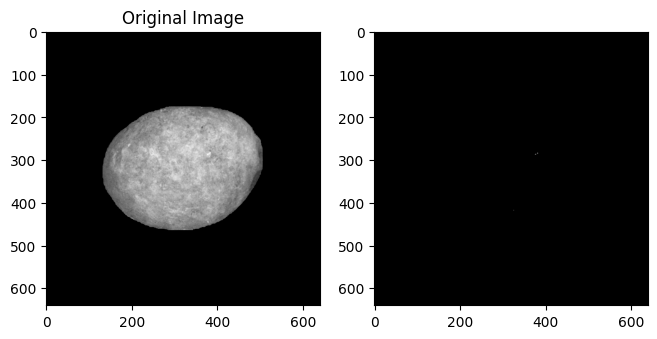

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
if potato_contour.shape[1] > 1:
    plt.plot(potato_contour[:, 0], potato_contour[:, 1], 'r', linewidth=2)
else:
    # Handle the case where the contour only has one point
    print("Contour only has one point.")
# plt.plot(potato_contour[:, 0], potato_contour[:, 1], 'r', linewidth=2)
plt.title('Boundary')

if reconstructed_contour is not None:
    plt.subplot(1, 3, 3)
    plt.imshow(thresh, cmap='gray')
    plt.plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], 'g', linewidth=2)
    plt.title('Reconstructed Boundary (20 Harmonics)')

plt.tight_layout()
plt.show()

In [1]:
# import cv2
# import numpy as np

# # Load the image
# img = cv2.imread('/home/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/good/Afra_12_2_1_108_0.png')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply thresholding to create a binary image
# _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# # Find contours in the binary image
# contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Draw contours on the original image
# cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# # Display the image with contours
# cv2.imshow('Contours', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()